In [182]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

In [183]:
# Load both the training data and see the categories of the intial prediction
df_train = pd.read_csv('train.csv')
df_train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

# EDA

In [184]:
# Take a look at what the data looks like
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Feature Engineering

In [185]:
# Creating a BMI value
df_train['BMI'] = df_train['Weight'] / np.square(df_train['Height'])

In [186]:
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151


In [187]:
# Since BMI is created, Height and Weight won't be needed
df_train = df_train.drop(columns=['Height', 'Weight'])

## Outlier check and removal

In [188]:
# See which of the columns are floating point values to do some outlier removal operations
floats = df_train.dtypes[df_train.dtypes != 'object'].keys()
floats = floats[1::]
floats

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object')

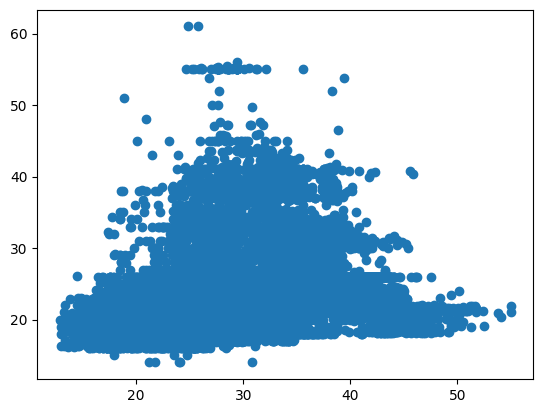

In [189]:
# plot the points
plt.scatter(x = 'BMI', y = 'Age', data = df_train)

In [190]:
# Use the above graph to check with values to remove
df_train[(df_train['Age'] >= 60)]

,id,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
5646,5646,Male,61.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Automobile,Overweight_Level_I,25.795918
10274,10274,Male,61.0,yes,no,2.0,3.0,Frequently,no,2.0,no,2.0,1.0,Frequently,Automobile,Overweight_Level_I,24.816327


In [191]:
remove_values = [1271, 4084, 7272, 11718, 5646, 10274, 4040, 6570, 8177, 8580, 10137, 16616]

In [192]:
df_train = df_train[df_train.id.isin(remove_values) == False]

In [193]:
# Check if there are any Na values in the data frame
df_train.isna().sum()

id                                0
Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

In [194]:
objects = df_train.dtypes[df_train.dtypes == 'object'].keys()
objects = objects[1::]
objects

Index(['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

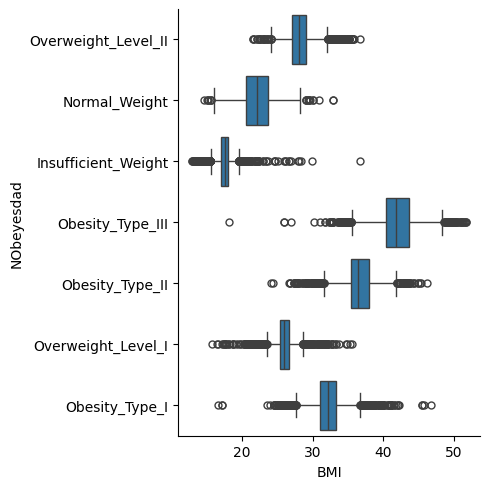

In [195]:
sns.catplot(data = df_train, x = 'BMI', y = 'NObeyesdad', kind = 'box')

## Correlation Matrix

<Axes: >

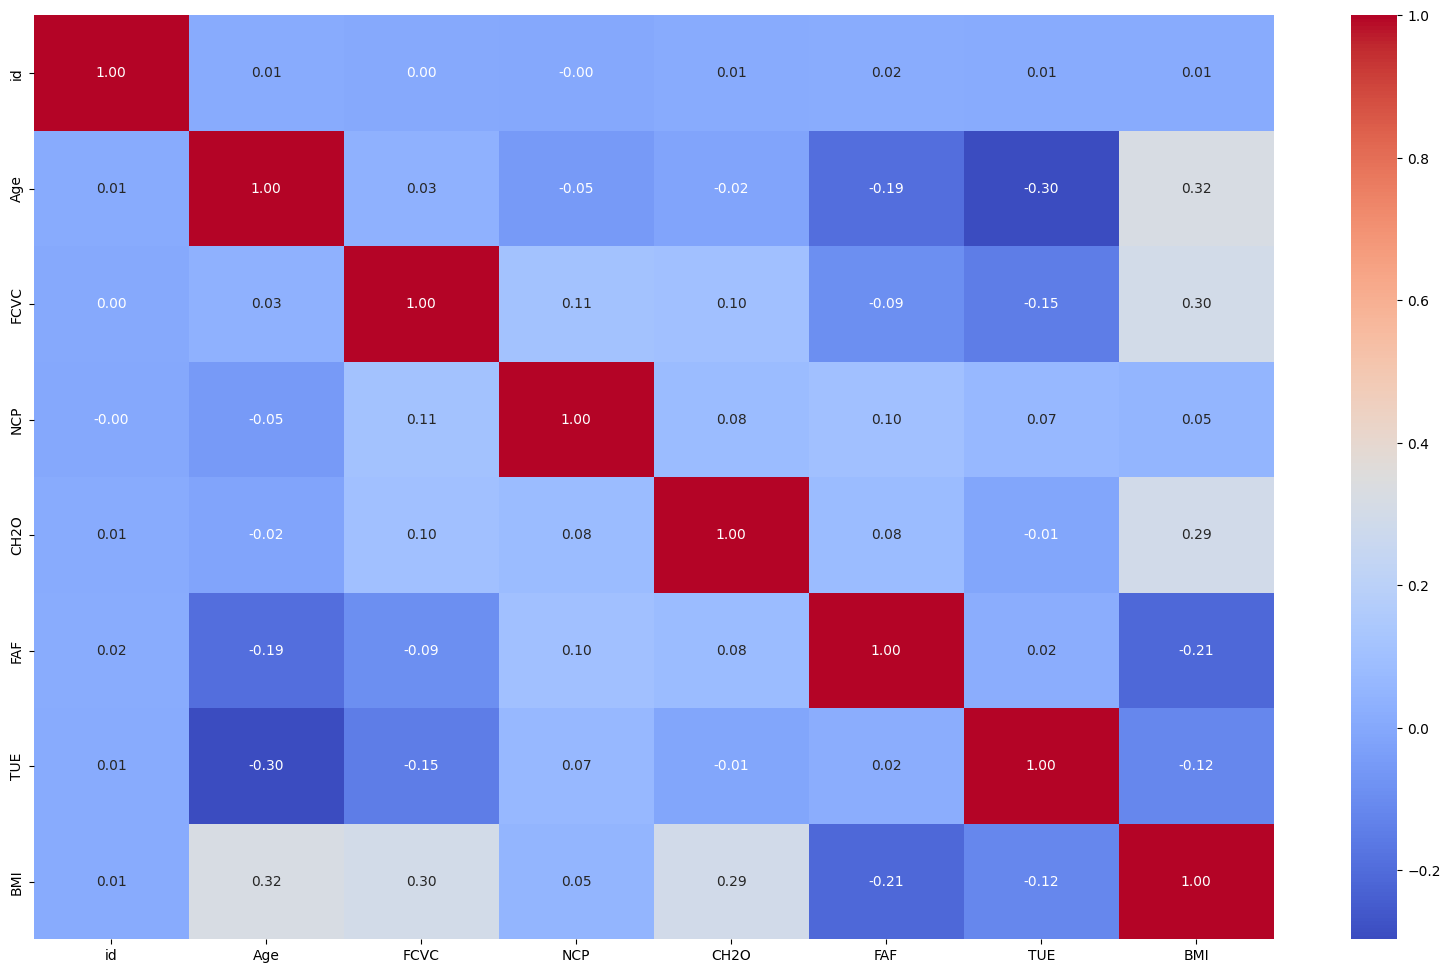

In [196]:
correlation_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize = (20, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt= '.2f')

# Check categorical variables and doing encodings

In [197]:
df_train.dtypes[df_train.dtypes == 'object']

Gender                            object
family_history_with_overweight    object
FAVC                              object
CAEC                              object
SMOKE                             object
SCC                               object
CALC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object

In [198]:
# Coding the Gender column with Female to "1" and Male to "0"
df_train['Gender'] = df_train['Gender'].map({'Female': 1, 'Male': 0})

# Coding all the columns with yes to "1" and no to "0"
df_train['family_history_with_overweight'] = df_train['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df_train['FAVC'] = df_train['FAVC'].map({'yes': 1, 'no': 0})
df_train['SMOKE'] = df_train['SMOKE'].map({'yes': 1, 'no': 0})
df_train['SCC'] = df_train['SCC'].map({'yes': 1, 'no': 0})

In [199]:
df_train['CAEC'].value_counts()
df_train['CALC'].value_counts()
df_train['MTRANS'].value_counts() 
df_train['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4040
Obesity_Type_II        3246
Normal_Weight          3082
Obesity_Type_I         2909
Overweight_Level_II    2522
Insufficient_Weight    2522
Overweight_Level_I     2425
Name: count, dtype: int64

There is a doubt that the variable <b>"MTRANS"</b> which is about commuting has a lot of contribition to the prediction So should be removed

In [200]:
# Changing the no to sometimes to a range of increasing numbers as this has a better way of indicating the predictions
df_train['CAEC'] = df_train['CAEC'].map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
df_train['CALC'] = df_train['CALC'].map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2})

# Also assigning the values back ti
df_train['NObeyesdad'] = df_train['NObeyesdad'].map({'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Overweight_Level_I' : 2,
                                                    'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Obesity_Type_II' : 5, 
                                                    'Obesity_Type_III' : 6})

In [201]:
df_train['MTRANS'].value_counts()

MTRANS
Public_Transportation    16678
Automobile                3531
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [202]:
df_train['MTRANS'] = df_train['MTRANS'].map({'Walking' : 0, 'Bike' : 1, 'Motorbike' : 2, 'Public_Transportation' : 3, 'Automobile' : 4})

In [203]:
df_train = df_train.drop(columns = ['id'])

In [204]:
df_train.head(5)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,24.443011,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,3,3,28.259565
1,1,18.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,4,1,23.422091
2,1,18.000000,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,3,0,17.126706
3,1,20.952737,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,3,6,44.855798
4,0,31.641081,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,3,3,25.599151


In [205]:
X = df_train.drop(columns = 'NObeyesdad')
y = df_train['NObeyesdad']

In [206]:
X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,24.443011,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,3,28.259565
1,1,18.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,4,23.422091
2,1,18.000000,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,3,17.126706
3,1,20.952737,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,3,44.855798
4,0,31.641081,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,3,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,25.137087,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,3,36.587084
20754,0,18.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,3,17.099278
20755,0,20.101026,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,3,31.889841
20756,0,33.852953,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,4,28.899693


# Model Training

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 23)

## Scikit Learn

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### XGBoost Classifier

In [104]:
param_grid_xgb = {
    'max_depth': [1, 3, 4, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [250, 330, 450, 600],
    'subsample': [0.5, 0.7, 1.0],
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [105]:
xgb_cv = GridSearchCV(xgb_clf, param_grid_xgb, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [ ]:
xgb_cv.fit(X_train, y_train)

In [110]:
print(xgb_cv.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.7}


In [158]:
xgb_fin = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate = 0.1, max_depth = 3,
                        n_estimators = 300, subsample = 0.7)

In [159]:
xgb_fin.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [160]:
y_pred_xgb = xgb_fin.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8909638554216868

<b>without MTRANS</b> 0.8831325301204819

<b>with MTRANS</b>

0.8848192771084338

<b>more training data</b> 0.886144578313253

<b> Best performing model </b> 0.8909638554216868 with params {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}

### LightGBM Classifier

In [100]:
param_grid_lgbm = {
    'max_depth': [3, 5, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 62, 127],
}

lgb_clf = LGBMClassifier()

In [70]:
lgb_cv = GridSearchCV(lgb_clf, param_grid_lgbm, cv=3, verbose=2, n_jobs=-1)

In [71]:
lgb_cv.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 19086, number of used features: 15
[LightGBM] [Info] Start training from score -2.112141
[LightGBM] [Info] Start training from score -1.907266
[LightGBM] [Info] Start training from score -2.152349
[LightGBM] [Info] Start training from score -2.096243
[LightGBM] [Info] Start training from score -1.960158
[LightGBM] [Info] Start training from score -1.857367
[LightGBM] [Info] Start training from score -1.637384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, -1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 62, 127]},
             verbose=2)

In [72]:
lgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 62}

In [73]:
lgb_fin = LGBMClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, num_leaves = 62)

In [74]:
lgb_fin.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 19086, number of used features: 15
[LightGBM] [Info] Start training from score -2.112141
[LightGBM] [Info] Start training from score -1.907266
[LightGBM] [Info] Start training from score -2.152349
[LightGBM] [Info] Start training from score -2.096243
[LightGBM] [Info] Start training from score -1.960158
[LightGBM] [Info] Start training from score -1.857367
[LightGBM] [Info] Start training from score -1.637384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(max_depth=5, num_leaves=62)

In [75]:
y_pred_lgbm = lgb_fin.predict(X_test)
accuracy_score(y_test, y_pred_lgbm)

0.8825301204819277

<b>without MTRANS</b> 0.8819277108433735

<b>with MTRANS</b> 0.883855421686747

### Random Forest Classifier

In [212]:
rfc = RandomForestClassifier(random_state = 23)

param_grid_rfc = {
    'max_depth' : [5, 10, 15, 25],
    'n_estimators' : [50, 100, 250, 500],
    'min_samples_split' : [5, 10, 15, 20]
}

In [213]:
rfr_cv = GridSearchCV(rfc, param_grid_rfc, cv = 5, scoring = 'accuracy', n_jobs = -1)

In [214]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 25],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='accuracy')

In [215]:
print(rfr_cv.best_params_)

{'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 250}


##### Best Parameters for Random Forest

In [218]:
# Best parameters
rfr_f = RandomForestClassifier(max_depth= 25, min_samples_split=10, n_estimators = 250)

In [219]:
rfr_f.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=250)

In [220]:
y_pred = rfr_f.predict(X_test)
accuracy_score(y_test, y_pred)

0.8897590361445783

<b>Without MTRANS</b> 0.8891566265060241 

<b>With MTRANS</b> 0.8848192771084338

0.8873493975903615

In [101]:
voting_clf = VotingClassifier([
    ('rf', rfr_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('lgb', lgb_cv.best_estimator_)
], weights = [1, 2, 3])

In [102]:
voting_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 19086, number of used features: 15
[LightGBM] [Info] Start training from score -2.112141
[LightGBM] [Info] Start training from score -1.907266
[LightGBM] [Info] Start training from score -2.152349
[LightGBM] [Info] Start training from score -2.096243
[LightGBM] [Info] Start training from score -1.960158
[LightGBM] [Info] Start training from score -1.857367
[LightGBM] [Info] Start training from score -1.637384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=25,
                                                     min_samples_split=10,
                                                     n_estimators=750,
                                                     random_state=23)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feat...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lgb',
                              LGBMClassifier(max_depth=5, num_leaves=62))],
                 weights=[1, 2, 3])

In [103]:
predictions_vote = voting_clf.predict(X_test)
accuracy_score(y_test, predictions_vote)

0.886144578313253

##### Adding the prediction to actual test data

In [170]:
df_test = pd.read_csv('test.csv')

In [171]:
df_test['Gender'] = df_test['Gender'].map({'Female': 1, 'Male': 0})

# Coding all the columns with yes to "1" and no to "0"
df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df_test['FAVC'] = df_test['FAVC'].map({'yes': 1, 'no': 0})
df_test['SMOKE'] = df_test['SMOKE'].map({'yes': 1, 'no': 0})
df_test['SCC'] = df_test['SCC'].map({'yes': 1, 'no': 0})

df_test['CAEC'] = df_test['CAEC'].map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
df_test['CALC'] = df_test['CALC'].map({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2})

df_test['MTRANS'] = df_test['MTRANS'].map({'Walking' : 0, 'Bike' : 1, 'Motorbike' : 2, 'Public_Transportation' : 3, 'Automobile' : 4})

In [172]:
df_test['BMI'] = df_test['Weight'] / np.square(df_test['Height'])

In [173]:
df_test_X = df_test.drop(columns = ['id', 'Height', 'Weight'])

In [174]:
df_test_X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,0,26.899886,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1.0,3,35.315411
1,1,21.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1.0,3,25.781250
2,1,26.000000,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1.0,3,41.324115
3,0,20.979254,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1.0,3,42.976937
4,1,26.000000,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1.0,3,39.584143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,0,23.327836,1,0,2.813234,3.000000,1,0,1.000000,0,0.807076,0.778632,1.0,3,26.333478
13836,1,29.000000,0,1,3.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1.0,3,24.524346
13837,1,22.935612,0,1,3.000000,2.273740,2,0,2.000000,0,1.949840,1.000000,1.0,3,17.652091
13838,0,21.000000,1,1,2.000000,3.000000,1,0,2.000000,0,3.000000,2.000000,0.0,3,20.195092


In [175]:
df_test_X['CALC'] = df_test_X['CALC'].fillna(0)

In [176]:
df_test_X.isna().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
BMI                               0
dtype: int64

In [177]:
predictions = xgb_fin.predict(df_test_X)

In [178]:
submission = df_test[['id']]
submission['NObeyesdad'] = predictions

C:\Users\micha\AppData\Local\Temp\ipykernel_1596\1897136591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['NObeyesdad'] = predictions


In [179]:
submission['NObeyesdad'] = submission['NObeyesdad'].map({0 : 'Insufficient_Weight', 1 : 'Normal_Weight', 2 : 'Overweight_Level_I',
                                                    3 : 'Overweight_Level_II', 4 : 'Obesity_Type_I', 5 : 'Obesity_Type_II', 
                                                    6 : 'Obesity_Type_III'})

C:\Users\micha\AppData\Local\Temp\ipykernel_1596\4152540742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['NObeyesdad'] = submission['NObeyesdad'].map({0 : 'Insufficient_Weight', 1 : 'Normal_Weight', 2 : 'Overweight_Level_I',


In [180]:
submission.to_csv('submission_xgb.csv', index = False)

<b>Random Forest has 0.88915</b>

<b>GBoost has 0.8831325301204819</b>

<b>LightGBM has 0.8819277108433735</b>

First model got 0.8301 on accuracy and 0.8277 on validation (with 0.01 learning rate)

Second model got 0.8737 (0.8693) on accuracy and 0.8651 (0.8620) on validation (with 0.01 learning rate)

Third model got 0.8257 on accuracy and 0.8181 on validation (with 0.01 learning rate)

Third model got 0.7962 on accuracy and 0.8271 on validation (with 0.02 learning rate)

#### Submitted the prediction above and got placed 2826 out of 3587 submission. Accuracy of the model is 0.89026. Just used XGBoost since the Voting Classifier and other models had a lower result